In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
from pathlib import Path
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from PIL import Image, ImageOps
import os
import matplotlib.colors
import cv2
from skimage.transform import rescale, resize
import re
import torchvision.transforms.v2 as transforms
from torchvision import tv_tensors
import torchio as tio
import matplotlib.colors as colors
from imgaug.augmentables import SegmentationMapsOnImage
import imgaug.augmenters as iaa
import imgaug
import os
from tqdm.notebook import tqdm
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [3]:
new_df = df.replace(np.nan, 0)
new_df.head(30)

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,0
1,case123_day20_slice_0001,small_bowel,0
2,case123_day20_slice_0001,stomach,0
3,case123_day20_slice_0002,large_bowel,0
4,case123_day20_slice_0002,small_bowel,0
5,case123_day20_slice_0002,stomach,0
6,case123_day20_slice_0003,large_bowel,0
7,case123_day20_slice_0003,small_bowel,0
8,case123_day20_slice_0003,stomach,0
9,case123_day20_slice_0004,large_bowel,0


In [8]:
segment_df = new_df[new_df['segmentation']!=0]
segment_df.head(100)
# a= ['24839 7 25100 14 25366 15 25632 15 25898 15 26164 15 26430 14 26697 12 26963 11 27234 2 28656 6 28920 9 29184 12 29449 14 29714 15 29980 16 30246 16 30512 16 30778 15 31045 14 31312 13 31578 12 31845 8 40126 2 40390 6 40655 8 40920 9 41186 10 41451 11 41717 11 41983 11 42249 11 42516 9 42783 8 43050 5',

# '25974 8 26238 13 26504 14 26769 16 27034 18 27296 22 27561 24 27826 25 28091 26 28356 27 28622 27 28888 27 29153 27 29419 26 29685 25 29952 23 29994 2 30219 20 30260 6 30486 17 30525 9 30791 10 31057 10 31323 11 31589 11 31855 12 32079 3 32121 12 32343 9 32387 13 32608 12 32653 14 32874 13 32919 16 33140 13 33185 18 33406 14 33451 20 33672 15 33717 21 33939 14 33983 21 34159 3 34208 12 34250 21 34424 5 34475 10 34517 21 34689 7 34742 9 34783 21 34953 9 35010 6 35050 20 35218 11 35316 20 35483 13 35580 23 35748 15 35813 11 35842 27 36013 16 36079 13 36107 28 36278 17 36345 16 36373 29 36544 17 36611 17 36638 30 36810 17 36878 17 36904 30 37077 16 37145 17 37170 31 37343 15 37412 17 37437 30 37610 13 37679 16 37703 30 37877 11 37945 16 37969 31 38144 9 38212 16 38235 31 38415 3 38478 16 38502 30 38746 11 38769 28 39013 7 39040 23 39281 3 39313 16 39582 12 39849 10 40115 8 40383 5', 

# '23557 3 23819 9 24083 12 24347 15 24611 18 24875 21 25139 24 25400 29 25665 30 25929 32 26193 33 26457 35 26722 35 26986 37 27250 38 27514 40 27777 42 28041 43 28306 43 28571 41 28836 34 29102 32 29367 31 29633 29 29899 27 30165 25 30431 23 30697 22 30964 17 31230 14 31497 10' ]

,id,class,segmentation
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...
...,...,...,...
327,case123_day20_slice_0110,large_bowel,11845 10 12107 17 12371 20 12636 22 12900 25 1...
328,case123_day20_slice_0110,small_bowel,17403 5 17462 19 17667 9 17726 25 17932 10 179...
330,case123_day20_slice_0111,large_bowel,11848 4 12110 12 12374 16 12639 18 12904 19 13...
331,case123_day20_slice_0111,small_bowel,16871 4 17135 8 17207 9 17399 11 17454 6 17461...


[0. 1. 2.]
[0 1 2]
[0 1 2]
[0. 1. 2.]


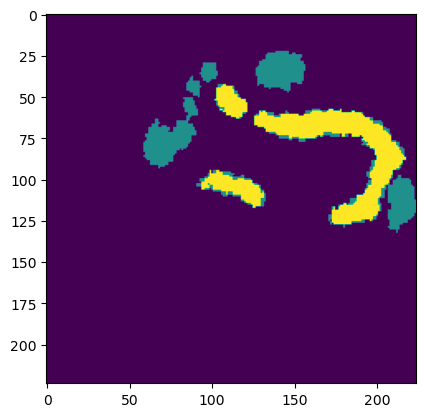

In [62]:
def rle2binary(*rle_str, img):
    mask = np.zeros(img.shape[0]**2)
    classes = [1,2,3]
    cl = 0
    for rle in rle_str:
        rle = np.array([eval(i) for i in rle.split(' ')])
        
        if rle_str!=0:
            index, pixels = rle[::2], rle[1::2]
            for i, ind in enumerate(index):
                mask[ind:ind+pixels[i]]=classes[cl]
        cl+=1
        
    return mask.reshape(img.shape)
rle_masks = segment_df.loc[[327,328], 'segmentation'].values
mask =rle2binary(*rle_masks,img = np.zeros((266,266))) 
print(np.unique(mask))
mask = cv2.resize(mask,(224,224))
mask = torchvision.transforms.Resize((224,224))(torch.tensor(mask))
print(np.unique(mask.int()))
mask =  train_transforms(tv_tensors.Mask(mask.int()))
print(np.unique(mask))
print(np.unique(mask.float()))
plt.imshow(mask)

In [61]:
def extract_paths(root):
    file_paths = []
    for folder, files, filenames in os.walk(root):
        for file in filenames:
            if file.endswith('.png'):
                file_paths.append((os.path.join(folder, file)))
    return file_paths

In [14]:
files = extract_paths('train')

In [15]:
files[0]

'train\\case101\\case101_day20\\scans\\slice_0001_266_266_1.50_1.50.png'

In [17]:
a=re.search('_\\d{3}_\\d{3}_',files[0].split('\\')[-1])

In [18]:
a.group(0).split('_')[1:3]

['266', '266']

In [19]:
new_df

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,0
1,case123_day20_slice_0001,small_bowel,0
2,case123_day20_slice_0001,stomach,0
3,case123_day20_slice_0002,large_bowel,0
4,case123_day20_slice_0002,small_bowel,0
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,0
115484,case30_day0_slice_0143,stomach,0
115485,case30_day0_slice_0144,large_bowel,0
115486,case30_day0_slice_0144,small_bowel,0


In [20]:
id = []
stomach = []
small_bowel = []
large_bowel =[]
i=0
while i < len(new_df)-2:
    id.append(new_df.loc[i, 'id'])
    large_bowel.append(new_df.loc[i, 'segmentation'])
    small_bowel.append(new_df.loc[i+1, 'segmentation'])
    stomach.append(new_df.loc[i+2, 'segmentation'])
    i+=3
final_df = pd.DataFrame({'id':id, 'large_bowel':large_bowel, 'small_bowel':small_bowel, 'stomach': stomach})

In [21]:
final_df[final_df['large_bowel']!=0]


,id,large_bowel,small_bowel,stomach
74,case123_day20_slice_0075,23058 4 23323 6 23588 8 23854 9 24119 10 24385...,0,12388 11 12652 14 12916 18 13180 22 13445 24 1...
75,case123_day20_slice_0076,22525 6 22789 9 23055 10 23320 11 23586 11 238...,0,12120 12 12384 16 12648 19 12913 22 13177 25 1...
76,case123_day20_slice_0077,19337 6 19602 8 19867 9 20133 9 20398 10 20664...,0,11852 13 12117 16 12382 18 12646 22 12911 24 1...
77,case123_day20_slice_0078,18541 4 18805 8 19070 10 19335 11 19600 13 198...,0,11589 3 11849 17 12114 19 12379 22 12643 25 12...
78,case123_day20_slice_0079,18275 6 18539 9 18804 11 19069 13 19334 14 195...,0,11583 14 11847 19 12112 22 12377 24 12642 26 1...
...,...,...,...,...
38484,case30_day0_slice_0133,17695 8 17957 23 18213 39 18477 45 18741 52 19...,23337 15 23601 20 23866 23 24131 25 24396 27 2...,0
38485,case30_day0_slice_0134,17694 5 17957 10 18215 2 18219 17 18478 32 187...,23336 13 23601 16 23867 18 24132 20 24398 21 2...,0
38486,case30_day0_slice_0135,17957 1 18219 10 18482 16 18744 23 19008 43 19...,22540 1 22804 5 23069 7 23334 10 23600 11 2386...,0
38487,case30_day0_slice_0136,18746 7 19009 23 19038 7 19273 44 19537 49 198...,23079 1 23343 6 23608 9 23874 11 24139 13 2440...,0


In [79]:
class GI_Tract_Dataset(torch.utils.data.Dataset):
    
    def __init__(self, root, csv_file, transform =None):
        super().__init__()
        self.filenames = self.extract_files(root)
        self.csv_file = csv_file
        self.transform= transform

    @staticmethod
    def extract_files(root):
        
        file_paths = []
        for folder, files, filenames in os.walk(root):
            for file in filenames:
                if file.endswith('.png'):
                    file_paths.append((os.path.join(folder, file)))
        return file_paths

    @staticmethod
    def rle2binary(*rle_string, img_size):
        mask = np.zeros(img_size[0]**2)
        classes = [1,2,3]
        cl = 0
        for rle in rle_string:

            if rle !=0:
                rle = np.array([eval(i) for i in rle.split(' ')])
                index, pixels = rle[::2], rle[1::2]
                for i, ind in enumerate(index):
                    mask[ind:ind+pixels[i]]=classes[cl]
            else:
                pass
                # print('No Mask')
            cl+=1
        
        return mask

    @staticmethod
    def normalize_standardize(img):
        
        normalized_img = (img - np.mean(img))/np.std(img)
        standardized_image = (normalized_img - normalized_img.min())/(normalized_img.max() - normalized_img.min())
        return standardized_image

    def augment(self, img, masks):
        seed = torch.randint(0, 10000,(1,)).item()
        torch.manual_seed(seed)
        imgaug.seed(seed)
        torch.random.manual_seed(seed)
        masks = tv_tensors.Mask(masks)
        img = tv_tensors.Image(img)
        img, masks = self.transform(img, masks)
        
        return img,masks
        
    def __len__(self):
        
        return len(self.csv_file)

    def __getitem__(self, index):
        
        file = self.csv_file.iloc[index]['id']
        case_id_file, size = self.get_file_size(file)
        
        img = Image.open(case_id_file)
        img = np.array([img.getdata()]).reshape(size)
        img = (img - img.min())/(img.max()- img.min())
        
        rle_masks = self.csv_file.iloc[index][['large_bowel', 'small_bowel', 'stomach']].values
        labels = self.rle2binary(*rle_masks, img_size=size)
        # print(np.unique(labels, return_counts = True))
        # print(np.unique(labels, return_counts = True)[-1]/np.unique(labels, return_counts = True)[-1].sum())
        img = self.normalize_standardize(img)
        img = cv2.resize(img, (224,224))
        img = np.expand_dims(img,axis = 0)

        masks = cv2.resize(labels.reshape(size),(224,224)).astype(np.int32)
        # print(np.unique(masks, return_counts = True))
        # print(np.unique(masks, return_counts = True)[-1]/np.unique(masks, return_counts = True)[-1].sum())
        masks = np.expand_dims(masks, axis = 0)

        if self.transform:
            img, masks = self.augment(img, masks)
        
        return torch.tensor(img),torch.tensor(masks)
        
    # @staticmethod
    def get_file_size(self,id_name):
        
        part_path = id_name.split('_slice')[0]+'\\scans\\slice_'+id_name.split('_slice_')[-1]
        size = None
        for file in self.filenames:
            if part_path in file:
                # print(file)
                size = re.search('_\\d{3}_\\d{3}_' ,file).group(0).split('_')[1:3]
                size = (eval(size[0]), eval(size[1])) 
                return file, size
        if size ==None:
            raise Exception('File not found')


In [80]:
train_transforms = transforms.Compose([transforms.RandomAffine(degrees = (-35,35), translate=(0, 0.15),scale=(0.9, 1.1)), 
                                       transforms.RandomHorizontalFlip(), 
                                       transforms.RandomResizedCrop(size=(224,224), scale= (0.35,1.0)), 
                                       transforms.ElasticTransform()])

# train_transforms = iaa.Sequential([iaa.Affine(scale = (0.85, 1.15), rotate = (-45,45)),iaa.ElasticTransformation()])
ds = GI_Tract_Dataset('train', final_df)#, transform=train_transforms)

train_data = GI_Tract_Dataset('train', final_df[0:int(len(final_df)*0.9)], transform = train_transforms)
val_data = GI_Tract_Dataset('train', final_df[int(len(final_df)*0.9):])

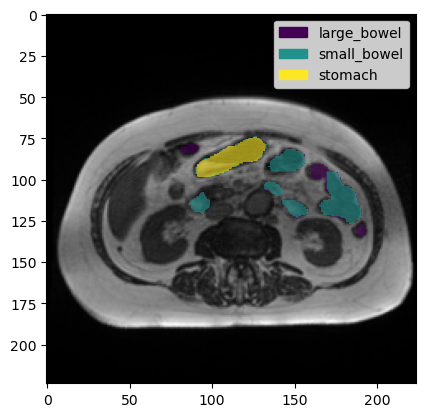

In [88]:
import matplotlib.patches as mpatches
ds = GI_Tract_Dataset('train', final_df,transform=None)#train_transforms)
img, label = ds[30860]#ds[30478]
labels = [1,2,3]
classes = ['large_bowel', 'small_bowel', 'stomach']
# fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.imshow(img[0], cmap = 'gray')
mask_ = np.ma.masked_where(label[0]==0, label[0])
im = plt.imshow(mask_, alpha = 0.6)
colors = [im.cmap(im.norm(value)) for value in labels]
patches = [ mpatches.Patch(color=colors[i], label=  classes[i]) for i in range(len(labels)) ]
plt.legend(handles=patches)
# for i in range(2):
#     for j in range(2):
#         img, label = ds[30860]
#         ax[i][j].imshow(img[0], cmap = 'bone')
#         # fig, ax = plt.subplots(1,3,figsize=(30,10))
#         cmaps = ['viridis', 'turbo', 'twilight']
#         classes = ['large_bowel', 'small_bowel', 'stomach']
#         c =['#ff242c', '#ffd670', '#70ffd6']
#         for k in range(3):
#             mask = label[k]
#             mask_ = np.ma.masked_where(mask == 0, mask)
#             cmaps= colors.ListedColormap(c[k])
#             ax[i][j].imshow(mask_, cmap = cmaps, alpha = 0.7,label = classes[k])   

# plt.figure(figsize=(2, 1))     #View colorbar and class names
# plt.scatter([1], [1], c='#ff242c', label='large_bowel', s=100)
# plt.scatter([2], [2], c='#ffd670', label='small_bowel', s=100)
# plt.scatter([3], [3], c='#70ffd6', label='stomach', s=100)
# plt.axis(False)
# plt.legend()
# plt.show()

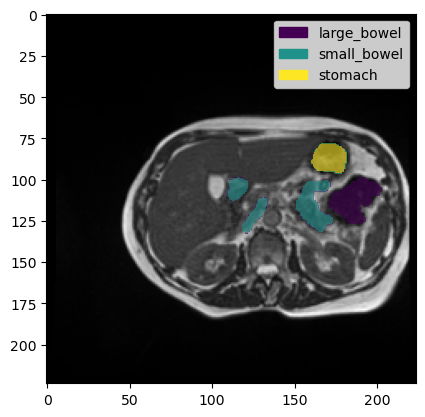

In [91]:
ds = GI_Tract_Dataset('train', final_df)
img, label = val_data[2060]#[30860]#ds[30478]
# print(img, label.shape)
plt.figure()
plt.imshow(img[0], cmap = 'bone')
classes = ['large_bowel', 'small_bowel', 'stomach']
# fig, ax = plt.subplots(1,3,figsize=(30,10))
plt.imshow(img[0], cmap = 'gray')
mask_ = np.ma.masked_where(label[0]==0, label[0])
im = plt.imshow(mask_, alpha = 0.6)
colors = [im.cmap(im.norm(value)) for value in labels]
patches = [mpatches.Patch(color=colors[i], label=  classes[i]) for i in range(len(labels))]
plt.legend(handles=patches)

# c =['#ff242c', '#ffd670', '#70ffd6']
# for i in range(3):
#     mask = label[i]
#     mask_ = np.ma.masked_where(mask == 0, mask)
#     cmaps= colors.ListedColormap(c[i])
#     plt.imshow(mask_, cmap = cmaps, alpha = 0.7,label = classes[i])   

# plt.figure(figsize=(2, 1))     #View colorbar and class names
# plt.scatter([], [], c='#ff242c', label='large_bowel', s=100)
# plt.scatter([], [], c='#ffd670', label='small_bowel', s=100)
# plt.scatter([], [], c='#70ffd6', label='stomach', s=100)
# plt.axis(False)
# plt.legend()
# plt.show()

In [ ]:
# mask_slices = []
# for i in tqdm(range(int(len(final_df)*0.9), len(final_df))):
#     slice_info = final_df.iloc[i]
#     if slice_info['large_bowel'] == 0 and slice_info['small_bowel'] == 0 and slice_info['stomach'] == 0:
#         mask_slices.append(0)
#     else:
#         mask_slices.append(1)
        
# mask_counts = np.unique(mask_slices, return_counts = True)
# print(np.unique(mask_slices, return_counts = True))
# weights = [len(final_df)/mask_counts[1][0],len(final_df)/mask_counts[1][1]]
# print(weights)
# class_weights = [weights[0] if i == 0 else weights[1] for i in mask_slices] 
# print(len(class_weights))

In [ ]:
mask_slices = []
for i in tqdm(range(int(len(final_df)*0.9))):
    slice_info = final_df.iloc[i]
    if slice_info['large_bowel'] == 0 and slice_info['small_bowel'] == 0 and slice_info['stomach'] == 0:
        mask_slices.append(0)
    else:
        mask_slices.append(1)
        
mask_counts = np.unique(mask_slices, return_counts = True)
print(np.unique(mask_slices, return_counts = True))
weights = [len(final_df)/mask_counts[1][0],len(final_df)/mask_counts[1][1]]
print(weights)
class_weights = [weights[0] if i == 0 else weights[1] for i in mask_slices] 
print(len(class_weights))

In [ ]:
sampler = torch.utils.data.WeightedRandomSampler(weights = class_weights, num_samples = len(train_data))
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 5, sampler = sampler)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 5, shuffle = False)
print(len(train_loader), len(val_loader))

In [ ]:
class DiceLoss(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, pred, mask):
        # pred, mask = pred[0], mask[0]
        dice = 0
        for i in range(pred.shape[0]):
            pred_ = torch.flatten(pred[i])
            # print(pred[i].shape, pred_.shape)
            mask_ = torch.flatten(mask[i])
            # print(mask[i].shape, mask_.shape)
            numerator = (pred_*mask_).sum()
            denominator = pred_.sum() + mask_.sum() + 1e-7
            dice += 1-(2*numerator)/denominator
        dice_ave = dice/pred.shape[0]
        return dice_ave

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(30,10))
classes = ['large_bowel', 'small_bowel', 'stomach']
c =['#ff242c', '#ffd670', '#70ffd6']
loss = DiceLoss1()
torch.manual_seed(0)
for i, batch in enumerate(train_loader):
    slices, masks = batch
    print(slices.shape, masks.shape)
    out =model(slices.float())
    print(out.shape)
    l=loss(out, masks)
    print(l)
    break
    
for j in range(5):
    slice = slices[j]
    mask = masks[j]
    pred = out[j]
    print(f'LB:{torch.any(mask[0])}, SB:{torch.any(mask[1])}, S: {torch.any(mask[2])}')
    ax[0][j].imshow(slice[0], cmap = 'bone')
    ax[1][j].imshow(slice[0], cmap = 'bone')
    for k in range(3):       
        mask_slice = mask[k]
        mask_ = np.ma.masked_where(mask_slice == 0, mask_slice)
        cmaps= colors.ListedColormap(c[k])
        ax[0][j].imshow(mask_, cmap = cmaps, alpha = 0.7,label = classes[k])   
        mask_slice = pred[k].detach().numpy()
        mask_ = np.ma.masked_where(mask_slice >0.5, mask_slice)
        cmaps= colors.ListedColormap(c[k])
        ax[1][j].imshow(mask_, cmap = cmaps, alpha = 0.7,label = classes[k])

plt.figure(figsize=(2, 1))     #View colorbar and class names
plt.scatter([], [], c='#ff242c', label='large_bowel', s=100)
plt.scatter([], [], c='#ffd670', label='small_bowel', s=100)
plt.scatter([], [], c='#70ffd6', label='stomach', s=100)
plt.axis(False)
plt.legend()
plt.show()

In [ ]:
class DoubleConv(torch.nn.Module):
    def __init__(self, in_channels, out_channels, relu):
        super().__init__()
        self.relu =relu
        self.conv = torch.nn.Sequential(torch.nn.Conv2d(in_channels , out_channels, kernel_size=3, padding=1), torch.nn.ReLU(),
                                        torch.nn.Conv2d(out_channels , out_channels, kernel_size=3, padding=1), torch.nn.ReLU())
        self.skip_relu = torch.nn.Sequential(torch.nn.Conv2d(in_channels , out_channels, kernel_size=3, padding=1), 
                                        torch.nn.Conv2d(out_channels , out_channels, kernel_size=3, padding=1))
    def forward(self, X):
        if self.relu == True:
            return self.skip_relu(X)
        else:
            return self.conv(X)

class Unet(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.encoder1 = DoubleConv(in_channels,64, False)
        self.encoder2 = DoubleConv(64,128, False)
        self.encoder3 = DoubleConv(128,256, False)
        self.encoder4 = DoubleConv(256,512, False)
        self.encoder5 = DoubleConv(512, 1024, False)
        self.decoder1 = DoubleConv(1024+512,512, False)
        self.decoder2 = DoubleConv(512+256,256, False)
        self.decoder3 = DoubleConv(256+128,128, False)
        self.decoder4 = DoubleConv(128+64,64, True)
        self.out = torch.nn.Conv2d(64, out_channels, kernel_size=1)
        self.upSample = torch.nn.UpsamplingBilinear2d(scale_factor=2)        
        self.MaxPool = torch.nn.MaxPool2d(kernel_size=2)

    def forward(self, X):
        x1= self.encoder1(X)
        x1_m = self.MaxPool(x1)
        
        x2= self.encoder2(x1_m)
        x2_m = self.MaxPool(x2)
       
        x3= self.encoder3(x2_m)
        x3_m = self.MaxPool(x3)
       
        x4= self.encoder4(x3_m)
        x4_m = self.MaxPool(x4)
       
        x5 = self.encoder5(x4_m)
        
        x6 = self.upSample(x5)
        x6 = torch.concat([x4, x6], axis = 1)
        x6 = self.decoder1(x6)
       
        x7 = self.upSample(x6)
        x7 = torch.concat([x3,x7], axis = 1)
        x7 = self.decoder2(x7)
        
        x8 = self.upSample(x7)
        x8 = torch.concat([x2,x8], axis = 1)
        x8 = self.decoder3(x8)
        
        x9 = self.upSample(x8)
        x9 = torch.concat([x1,x9], axis = 1)
        x9 = self.decoder4(x9)
        
        out = self.out(x9)
        return out       
        
        
        

In [ ]:
torch.manual_seed(0)
model = UNet_Model()
# test_input = slices#torch.rand((5,1,224,224))
# label = masks
# out = model(test_input.float())

# print(test_input.shape,out.shape, label.shape)
# loss =DiceLoss()
# print(loss(out, label))


In [ ]:
## test_input.shape, out.shape

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (10,3))
for i in range(3):
    mask = out[0][i].detach().numpy()
    mask_ = np.ma.masked_where(mask >0.5, mask)
    ax[i].imshow(mask, cmap ='viridis')

In [ ]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torchmetrics import Accuracy

In [ ]:
class DiceLoss1(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):
        dice_ave = 0        
        for b in range(pred.shape[0]):
            # dice = 0
            for i in range(pred.shape[1]): 
                pred_, mask_ = pred[b][i], mask[b][i]
                pred_ = torch.flatten(pred_)
                mask_ = torch.flatten(mask_)
                numerator = (pred_* mask_).sum()
                denominator = pred_.sum() + mask_.sum() + 1e-7
                dice = (2*numerator)/denominator
                # dice_channels[i].append(dice)
                dice_ave+= dice
        dice_score = dice_ave / (pred.shape[0]* pred.shape[1])
        return 1-dice_score

# class DiceLoss(torch.nn.Module):
#     def __init__(self):
#         super().__init__()

#     def forward(self, pred, mask):
#         dice_ave = 0        
#         pred = torch.flatten(pred)
#         mask =torch.flatten(mask)
#         print(pred.shape, mask.shape)
#         numerator = (pred* mask).sum()
#         denominator = pred.sum() + mask.sum() + 1e-7
#         dice = (2*numerator)/denominator
#         return 1-dice
        

In [ ]:
class UNet_Model(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = Unet(1,3)
        self.loss_fn = DiceLoss()
        # self.loss_fn = torch.nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = 0.0001)
        # self.accuracy = Accuracy(task)
        
    def forward(self, X):
        # print('Here')
        return torch.sigmoid(self.model(X.float()))

    def training_step(self, batch, batch_idx):
        slice, mask = batch
        pred = self(slice)
        train_loss = self.loss_fn(pred, mask.float())
        # train_acc = self.accuracy(pred, mask)
        self.log('Train_loss', train_loss)
        # self.log('Train_Accuracy', train_acc)

        if batch_idx%100 ==0:
            self.log_images(slice.cpu(), mask.cpu(), pred.cpu(), 'Train')     
        return train_loss

    def validation_step(self, batch, batch_idx):
        slice, mask = batch
        pred = self(slice)
        val_loss = self.loss_fn(pred, mask.float())
        # val_acc = self.accuracy(pred, mask)
        self.log('Val_loss', val_loss)
        # self.log('Val_Accuracy', val_acc)

        if batch_idx%50 ==0:
            self.log_images(slice.cpu(), mask.cpu(), pred.cpu(), 'Val')
        return val_loss

    def log_images(self, slices, masks, preds, name):
        fig, ax = plt.subplots(slices.shape[0]+1,2, figsize = (10,60))
        classes = ['large_bowel', 'small_bowel', 'stomach']
        c =['#ff242c', '#ffd670', '#70ffd6']
        for i in range(slices.shape[0]):
            slice, mask, pred = slices[i], masks[i], preds[i]#.clone().detach().numpy()
            ax[i][0].imshow(slice[0], cmap = 'bone')
            ax[i][1].imshow(slice[0], cmap = 'bone')
            ax[i][0].set_title('Original Label')
            ax[i][1].set_title('Predictd Mask')
            for j in range(3): 
                pred = pred>0.5
                mask_ = np.ma.masked_where(mask[j] ==0,mask[j])
                cmaps= colors.ListedColormap(c[j])
                ax[i][0].imshow(mask_, alpha = 0.5, cmap = cmaps)
                mask_ = np.ma.masked_where(pred[j] ==0,pred[j])
                ax[i][1].imshow(mask_, alpha = 0.5, cmap = cmaps)
                # print(pred.shape, mask.shape)
        ax[-1][0].scatter([], [], c='#ff242c', label='large_bowel', s=100)
        ax[-1][0].scatter([], [], c='#ffd670', label='small_bowel', s=100)
        ax[-1][0].scatter([], [], c='#70ffd6', label='stomach', s=100)
        ax[-1][0].axis(False)
        ax[-1][0].legend()
        self.logger.experiment.add_figure(name, fig, self.global_step)

    def configure_optimizers(self):
        return [self.optimizer]

In [ ]:
checkpoint = ModelCheckpoint(monitor = 'Val_loss', save_top_k=10, mode = 'min')
trainer = pl.Trainer(accelerator = 'gpu', logger = TensorBoardLogger(save_dir = './logs'), max_epochs = 50,callbacks= checkpoint)

In [ ]:
device = ['cuda:0' if torch.cuda.is_available() else 'cpu']
torch.manual_seed(0)
model = UNet_Model()
model = model.to(device[0])
trainer.fit(model, train_loader, val_loader)

In [ ]:
torch.manual_seed(0)
for i, batch in enumerate(train_loader):
    slices, labels = batch
    break

In [ ]:
test_model = UNet_Model()

In [ ]:
preds = test_model(slices)
print(preds[0])
pred_clone = preds.clone().detach()
print(pred_clone)

In [ ]:
print(DiceLoss()(preds, labels))

In [ ]:
labels

In [ ]:
for i in range(preds.shape[0]):
    print(preds[i]>0.5)